In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [44]:
penguins = pd.read_csv('penguins.csv')
penguins = penguins.dropna()
encoder = LabelEncoder()
penguins['Species'] = encoder.fit_transform(penguins['Species'])
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [47]:
X = pd.get_dummies(penguins.drop('Species', axis=1), drop_first=True)
y = penguins['Species']

In [48]:
print("Dane przed standaryzacją:")
print(X.head())

Dane przed standaryzacją:
   CulmenLength  CulmenDepth  FlipperLength  BodyMass
0          39.1         18.7          181.0    3750.0
1          39.5         17.4          186.0    3800.0
2          40.3         18.0          195.0    3250.0
4          36.7         19.3          193.0    3450.0
5          39.3         20.6          190.0    3650.0


In [49]:
print("Dane przed standaryzacją:")
print(X.head())

Dane przed standaryzacją:
   CulmenLength  CulmenDepth  FlipperLength  BodyMass
0          39.1         18.7          181.0    3750.0
1          39.5         17.4          186.0    3800.0
2          40.3         18.0          195.0    3250.0
4          36.7         19.3          193.0    3450.0
5          39.3         20.6          190.0    3650.0


In [50]:
print("\nDane po standaryzacji (StandardScaler):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())


Dane po standaryzacji (StandardScaler):
   CulmenLength  CulmenDepth  FlipperLength  BodyMass
0     -0.884499     0.785449      -1.418347 -0.564142
1     -0.811126     0.126188      -1.062250 -0.501703
2     -0.664380     0.430462      -0.421277 -1.188532
3     -1.324737     1.089724      -0.563715 -0.938776
4     -0.847812     1.748985      -0.777373 -0.689020


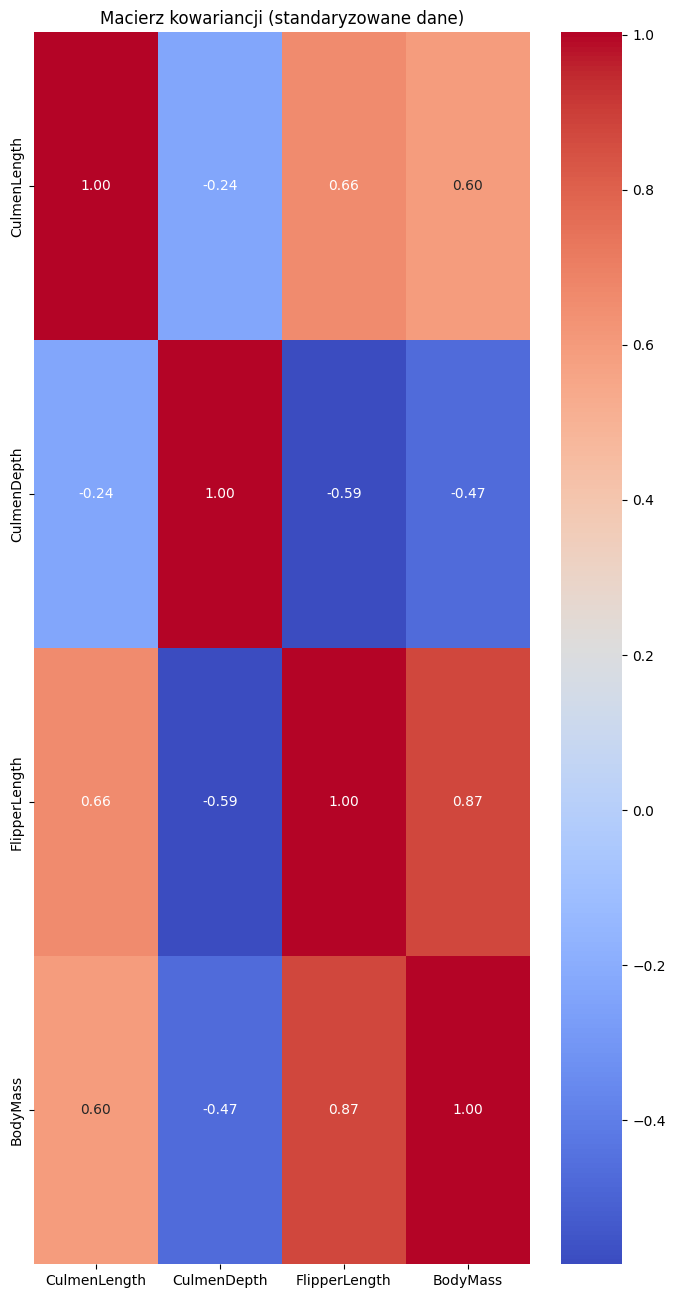

In [51]:
cov_matrix = np.cov(X_scaled.T)
plt.figure(figsize=(8, 16))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=X.columns, yticklabels=X.columns)
plt.title("Macierz kowariancji (standaryzowane dane)")
plt.show()

In [52]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigen_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)
total_variance = sum(eigenvalues)
explained_variance = [(i / total_variance) for i in sorted(eigenvalues, reverse=True)]
cumulative_variance = np.cumsum(explained_variance)

In [53]:
print("\nWyjaśniona wariancja dla każdej składowej:")
for i, var in enumerate(explained_variance):
    print(f"Składowa {i+1}: {var:.2%}")


Wyjaśniona wariancja dla każdej składowej:
Składowa 1: 68.84%
Składowa 2: 19.31%
Składowa 3: 9.13%
Składowa 4: 2.71%


In [54]:
projection_matrix = np.hstack((
    eigen_pairs[0][1].reshape(-1, 1),
    eigen_pairs[1][1].reshape(-1, 1)
))
X_pca = X_scaled.dot(projection_matrix)

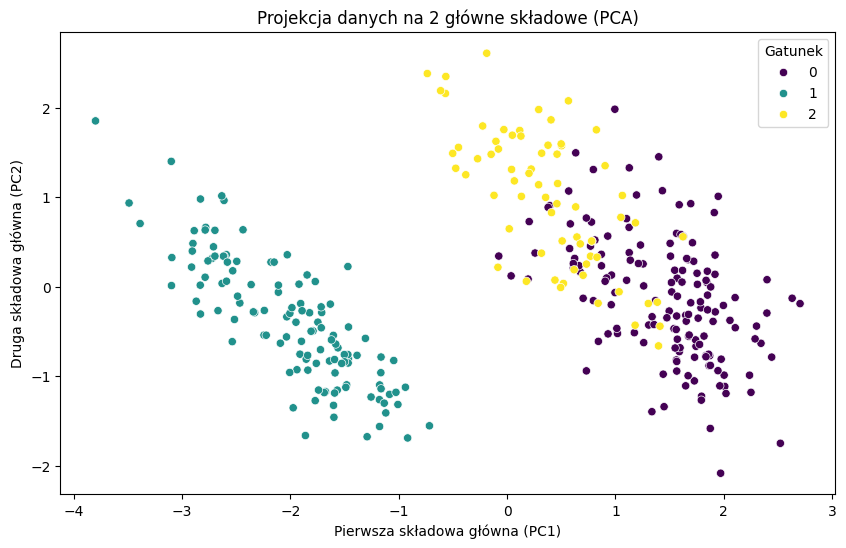

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title("Projekcja danych na 2 główne składowe (PCA)")
plt.xlabel("Pierwsza składowa główna (PC1)")
plt.ylabel("Druga składowa główna (PC2)")
plt.legend(title='Gatunek')
plt.show()

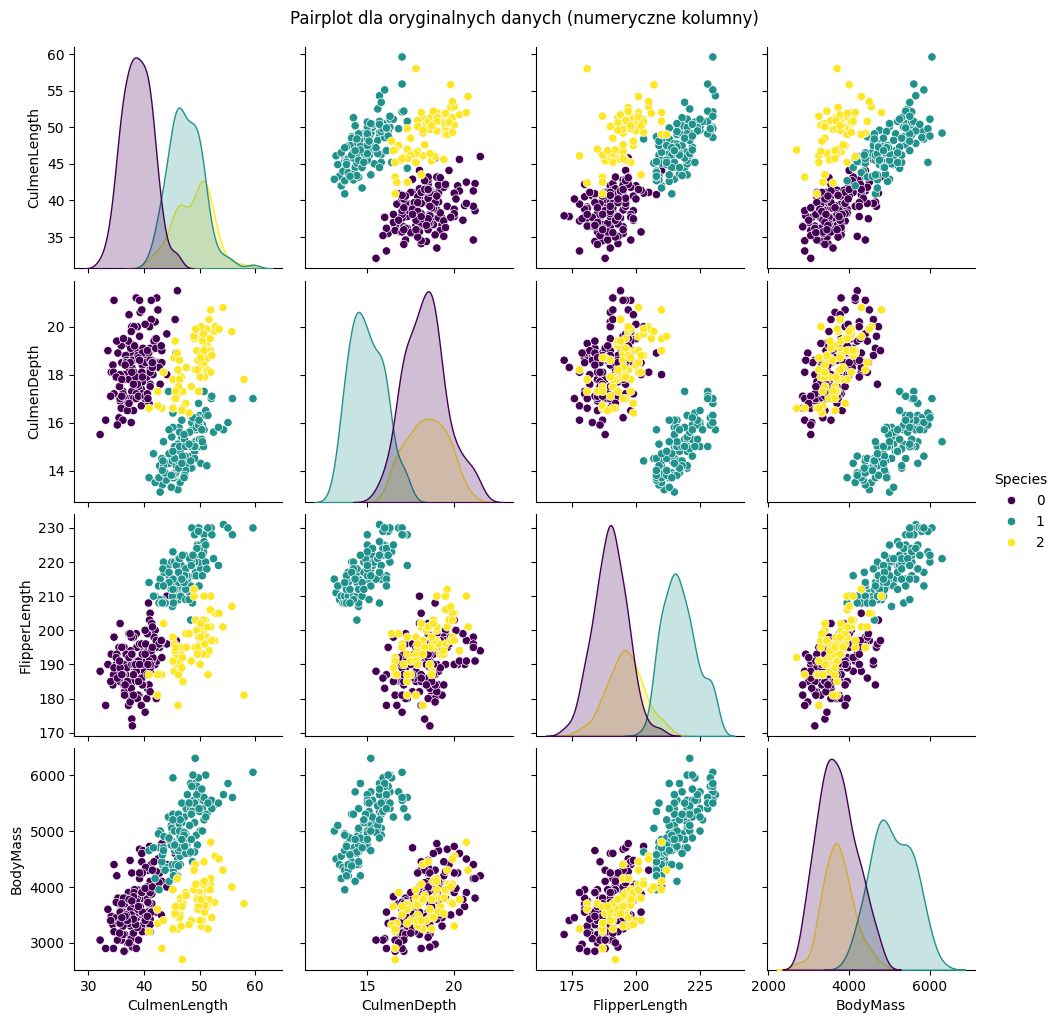

In [30]:
numeric_cols = penguins.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(penguins[numeric_cols], hue='Species', palette='viridis')
plt.suptitle("Pairplot dla oryginalnych danych (numeryczne kolumny)", y=1.02)
plt.show()